# Sentiment Analysis using LSTM in Keras

## Dataset
IMDB has 50000 movie reviews with labels: 'positive' and 'negative'. Here, we would train a LSTM model to predict the associated sentiment (binary class classification).

In [23]:
#import libraries
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading dataset
np.random.seed(1)
vocabulary_len = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_len)

In [3]:
'''
pre proceesing sequence length: this would truncate begining words if the length of a review is greater than maximum 
sequence length. If the review length is less than maximum sequence length then it would perform zero padding
in the begining
'''
max_sequence_len = 100 
x_train = sequence.pad_sequences(x_train, maxlen=max_sequence_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_sequence_len)

In [51]:
#defining model architecture
embedding_vector_len = 300
model = Sequential()
model.add(Embedding(input_dim=vocabulary_len, output_dim=embedding_vector_len, input_length=max_sequence_len))
model.add(LSTM(units=50, dropout=0.5, recurrent_dropout=0.6, kernel_regularizer=regularizers.l2(0.4)))
model.add(Dense(units=1, activation='sigmoid'))

In [52]:
#compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
#model fitting
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 172s 7ms/step - loss: 4.5550 - acc: 0.5324 - val_loss: 0.6901 - val_acc: 0.6863
Epoch 2/5
25000/25000 [==============================] - 178s 7ms/step - loss: 0.6272 - acc: 0.7238 - val_loss: 0.5270 - val_acc: 0.7797
Epoch 3/5
25000/25000 [==============================] - 178s 7ms/step - loss: 0.5150 - acc: 0.8004 - val_loss: 0.5217 - val_acc: 0.7728
Epoch 4/5
25000/25000 [==============================] - 176s 7ms/step - loss: 0.4541 - acc: 0.8308 - val_loss: 0.5242 - val_acc: 0.7680
Epoch 5/5
25000/25000 [==============================] - 176s 7ms/step - loss: 0.4289 - acc: 0.8460 - val_loss: 0.5537 - val_acc: 0.7770


In [54]:
print(history.history.keys())

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])


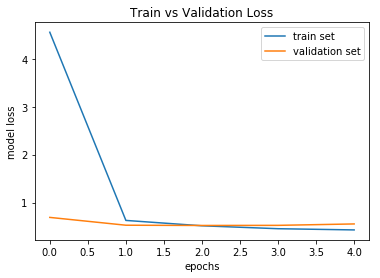

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('model loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Loss')

In [57]:
#test set performance
_, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: ", accuracy)

25000/25000 [==============================] - 23s 938us/step
Test Accuracy:  0.77704
